In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.array([[1, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1]])
df = pd.DataFrame(data.T, columns=['cold', 'sun', 'walk'])
df

,cold,sun,walk
0,1,0,0
1,0,0,1
2,0,1,1
3,1,1,1
4,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(df.drop('walk', axis=1), df['walk'])

DecisionTreeClassifier()

In [ ]:
model.get_depth()

2

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

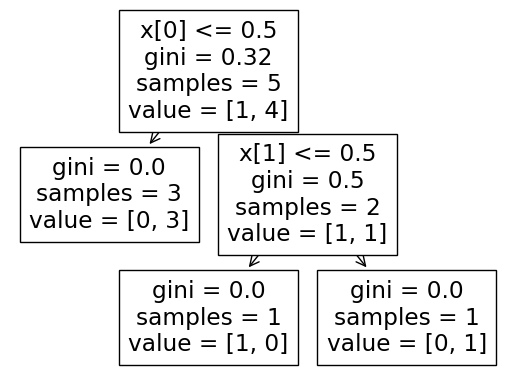

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model)

In [ ]:
model.feature_importances_

array([0.375, 0.625])

In [ ]:
model.feature_names_in_

array(['cold', 'sun'], dtype=object)

In [ ]:
model.score(df.drop('walk', axis=1), df['walk'])

1.0

# **Music dataset**

In [ ]:
df = pd.read_csv('light_music.csv')
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,blues
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,blues
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,blues
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,blues
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,blues


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5000 non-null   int64  
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   bool   
 3   danceability      5000 non-null   float64
 4   energy            5000 non-null   float64
 5   key               5000 non-null   int64  
 6   loudness          5000 non-null   float64
 7   mode              5000 non-null   int64  
 8   speechiness       5000 non-null   float64
 9   acousticness      5000 non-null   float64
 10  instrumentalness  5000 non-null   float64
 11  liveness          5000 non-null   float64
 12  valence           5000 non-null   float64
 13  tempo             5000 non-null   float64
 14  time_signature    5000 non-null   int64  
 15  track_genre       5000 non-null   object 
dtypes: bool(1), float64(9), int64(5), object(1

In [ ]:
df.describe().round(1)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,38.2,217086.6,0.6,0.7,5.4,-6.8,0.6,0.1,0.3,0.0,0.2,0.5,122.7,3.9,2.0
std,28.3,59613.3,0.1,0.2,3.5,2.9,0.5,0.1,0.3,0.1,0.2,0.2,30.5,0.4,1.4
min,0.0,42440.0,0.1,0.0,0.0,-21.4,0.0,0.0,0.0,0.0,0.0,0.0,45.9,1.0,0.0
25%,1.0,177845.2,0.5,0.5,2.0,-8.3,0.0,0.0,0.0,0.0,0.1,0.4,98.0,4.0,1.0
50%,38.0,208852.5,0.6,0.7,6.0,-6.2,1.0,0.0,0.1,0.0,0.1,0.5,120.6,4.0,2.0
75%,65.0,243352.8,0.7,0.8,8.0,-4.7,1.0,0.1,0.5,0.0,0.3,0.7,143.9,4.0,3.0
max,100.0,953946.0,1.0,1.0,11.0,0.4,1.0,0.7,1.0,0.9,1.0,1.0,243.4,5.0,4.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


df[['track_genre']] = OrdinalEncoder().fit_transform(df[['track_genre']])
X_train, X_test, y_train, y_test = train_test_split(df.drop('popularity',
                                                            axis=1),
                                                            df['popularity'],
                                                            test_size=0.2,
                                                            random_state=1)
X_train.shape, X_test.shape

((4000, 15), (1000, 15))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

882.1089755234448

In [ ]:
mean_squared_error(y_test, y_pred)/df['popularity'].std()

31.133071433091732

In [ ]:
model.get_depth()

30

In [ ]:
for i in range(1, 26):
    model = DecisionTreeRegressor(random_state=1, max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('max_depth: ', i, ', MSE = ', mean_squared_error(y_test, y_pred))

max_depth:  1 , MSE =  815.2921112930641
max_depth:  2 , MSE =  797.6766439903944
max_depth:  3 , MSE =  754.0333900205204
max_depth:  4 , MSE =  731.2300653993958
max_depth:  5 , MSE =  732.2296695868393
max_depth:  6 , MSE =  726.9828743719165
max_depth:  7 , MSE =  734.5558716145805
max_depth:  8 , MSE =  717.1451170342625
max_depth:  9 , MSE =  713.4248326802455
max_depth:  10 , MSE =  705.9118548904995
max_depth:  11 , MSE =  741.2972239170822
max_depth:  12 , MSE =  790.0687135323275
max_depth:  13 , MSE =  826.1834190508737
max_depth:  14 , MSE =  822.5051090065332
max_depth:  15 , MSE =  818.7708010605464
max_depth:  16 , MSE =  856.8310829784996
max_depth:  17 , MSE =  862.1284154889253
max_depth:  18 , MSE =  899.805562782012
max_depth:  19 , MSE =  895.9009357460767
max_depth:  20 , MSE =  934.8442276439542
max_depth:  21 , MSE =  881.2608541918388
max_depth:  22 , MSE =  894.4339561748736
max_depth:  23 , MSE =  917.8780254476858
max_depth:  24 , MSE =  913.7124200005286
ma

In [ ]:
def conditions(row):
    if row > 50:
        return 1
    else:
        return 0

y_train_bin = pd.DataFrame(map(conditions, y_train))
y_test_bin = pd.DataFrame(map(conditions, y_test))

In [ ]:
y_train_bin.value_counts()

0    2373
1    1627
Name: count, dtype: int64

max_depth:  1 , accuracy =  0.599
max_depth:  2 , accuracy =  0.675
max_depth:  3 , accuracy =  0.675
max_depth:  4 , accuracy =  0.651
max_depth:  5 , accuracy =  0.665
max_depth:  6 , accuracy =  0.65
max_depth:  7 , accuracy =  0.681
max_depth:  8 , accuracy =  0.677
max_depth:  9 , accuracy =  0.678
max_depth:  10 , accuracy =  0.69
max_depth:  11 , accuracy =  0.691
max_depth:  12 , accuracy =  0.676
max_depth:  13 , accuracy =  0.68
max_depth:  14 , accuracy =  0.691
max_depth:  15 , accuracy =  0.696
max_depth:  16 , accuracy =  0.693
max_depth:  17 , accuracy =  0.698
max_depth:  18 , accuracy =  0.687
max_depth:  19 , accuracy =  0.698
max_depth:  20 , accuracy =  0.689
max_depth:  21 , accuracy =  0.695
max_depth:  22 , accuracy =  0.695
max_depth:  23 , accuracy =  0.696
max_depth:  24 , accuracy =  0.694
max_depth:  25 , accuracy =  0.693


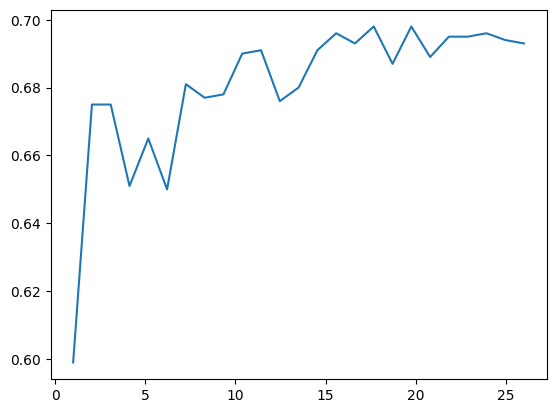

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


accuracy = []
for i in range(1, 26):
    model = DecisionTreeClassifier(random_state=1, max_depth=i)
    model.fit(X_train, y_train_bin)
    y_pred = model.predict(X_test)
    print('max_depth: ', i, ', accuracy = ', accuracy_score(y_test_bin, y_pred))
    accuracy.append(accuracy_score(y_test_bin, y_pred))

plt.plot(np.linspace(1, 26, 25), accuracy)

In [ ]:
max(accuracy)

0.698

In [ ]:
sorted([(model.feature_names_in_[i], model.feature_importances_[i]) for i in range(len(model.feature_names_in_))], key=lambda x: x[1], reverse=True)

[('valence', 0.10244026919108976),
 ('acousticness', 0.09835740037157908),
 ('loudness', 0.09595287452337022),
 ('duration_ms', 0.09230015683608836),
 ('track_genre', 0.09058322092818853),
 ('speechiness', 0.08474048444886127),
 ('liveness', 0.08228932334469537),
 ('energy', 0.07999235475647183),
 ('tempo', 0.07202976795776456),
 ('danceability', 0.06992161277350888),
 ('instrumentalness', 0.0605948625509884),
 ('key', 0.04134146206453035),
 ('explicit', 0.011389432379644543),
 ('mode', 0.00904726259147664),
 ('time_signature', 0.009019515281742406)]

# **Random Forest**

In [ ]:
df = pd.read_csv('music_prepared.csv')
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.drop('popularity', axis=1),
                                                    df['popularity'],
                                                    test_size=0.2,
                                                    random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

29.700319451538643

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, forest_y_pred))

22.691988372811892

In [ ]:
29.700319451538643 - 22.691988372811892

7.008331078726751

22.660196475839786

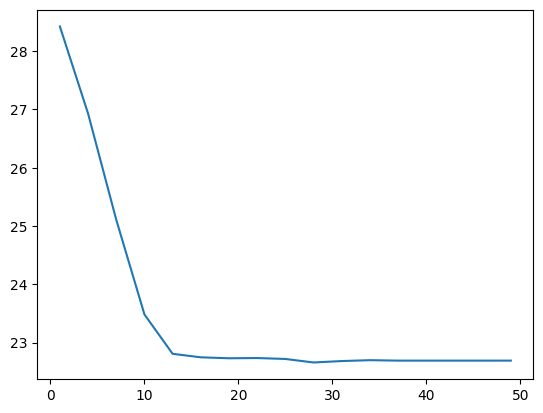

In [ ]:
rmse = []


for i in range(1, 51, 3):
    fm = RandomForestRegressor(random_state=1, max_depth=i)
    fm.fit(X_train, y_train)
    fm_y_pred = fm.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, fm_y_pred)))
plt.plot([i for i in range(1, 51, 3)], rmse)
min(rmse)

In [ ]:
def conditions(row):
    if row > 50:
        return 1
    else:
        return 0


y_train_bin = pd.DataFrame(map(conditions, y_train))
y_test_bin = pd.DataFrame(map(conditions, y_test))

In [ ]:
model = DecisionTreeClassifier(random_state=1, max_depth=17)
model.fit(X_train, y_train_bin)
print('train: ', accuracy_score(y_train_bin, model.predict(X_train)))
print('test: ', accuracy_score(y_test_bin, model.predict(X_test)))

train:  0.9805
test:  0.698


In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train_bin)
print('train: ', accuracy_score(y_train_bin, model.predict(X_train)))
print('test: ', accuracy_score(y_test_bin, model.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


train:  0.9935
test:  0.777


In [ ]:
0.777-0.698

0.07900000000000007

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

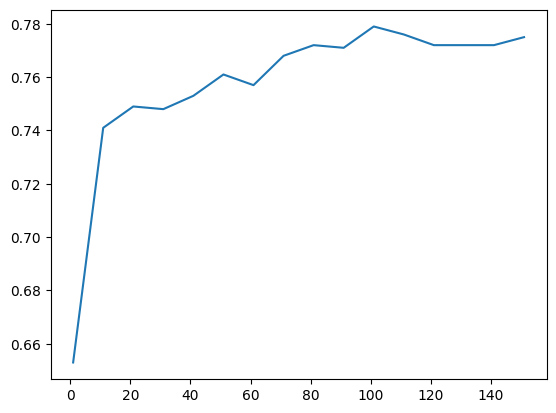

In [ ]:
from sklearn.ensemble import RandomForestClassifier


accuracy = []

for i in range(1, 152, 10):
    model = RandomForestClassifier(n_estimators=i, random_state=1)
    model.fit(X_train, y_train_bin)
    accuracy.append(accuracy_score(y_test_bin, model.predict(X_test)))
plt.plot([i for i in range(1, 152, 10)], accuracy)

# **Myself  RandomForest**

In [ ]:
np.random.seed(42)  # для фиксации случайности

def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):
        data = data.copy().values  # перевод таблицы в numpy array

    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.copy().values  # перевод целевого признака в numpy array

    n_samples = int(data.shape[0]*max_samples)  # подсчет кол-ва объектов в подвыборках
    bootstrap = []  # список для будущих подвыборок

    for i in range(n):

        sample_index = np.random.choice(range(len(data)), size=n_samples)
        # взятие случайных индексов в кол-ве n_samples
        b_data = [data[i] for i in sample_index]  # взятие объектов по выбранным индексам
        b_labels = [labels[i] for i in sample_index]
        # взятие целевых значений по выбранным индексам

        bootstrap.append((b_data, b_labels))  # добавление в список подвыборок

    return bootstrap




'''
Пример работы функции на данных из двух признаков на первом запуске:

sample_X = np.array([
    [0, 0],
    [1, 1],
    [2, 2]
])

sample_y = np.array([0, 1, 2])

get_bootstrap(sample_X, sample_y, n=3, max_samples=1.0)

Output:

[(array([[2, 2],
         [0, 0],
         [2, 2]]),
  array([2, 0, 2])),
 (array([[2, 2],
         [0, 0],
         [0, 0]]),
  array([2, 0, 0])),
 (array([[2, 2],
         [1, 1],
         [2, 2]]),
  array([2, 1, 2]))]
'''


'\nПример работы функции на данных из двух признаков на первом запуске:\n\nsample_X = np.array([\n    [0, 0],\n    [1, 1],\n    [2, 2]\n])\n\nsample_y = np.array([0, 1, 2])\n\nget_bootstrap(sample_X, sample_y, n=3, max_samples=1.0)\n\nOutput:\n\n[(array([[2, 2],\n         [0, 0],\n         [2, 2]]),\n  array([2, 0, 2])),\n (array([[2, 2],\n         [0, 0],\n         [0, 0]]),\n  array([2, 0, 0])),\n (array([[2, 2],\n         [1, 1],\n         [2, 2]]),\n  array([2, 1, 2]))]\n'

In [ ]:
bootstrapped = get_bootstrap(X_train, y_train_bin, n=3, max_samples=0.01)

In [ ]:
s = 0

for i in range(len(bootstrapped[0][-1])):
    if bootstrapped[0][-1][i][0] == 1:
        s += 1
s

12

In [ ]:
np.random.seed(42)  # для фиксации случайности


def get_subsample(features, max_features=1.0):

    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array
    len_features = int(features.shape[0]*max_features)  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайных индексов признаков
        sample_indexes,
        size=len_features,  # в кол-ве len_features
        replace=False  # без повторений
    )

    return features[subsample]  # на список выходе признаки


'''
Пример работы функции на данных из трех признаков на первом запуске:

sample_features = ['f1', 'f2', 'f3']
print(get_subsample(sample_features, max_features=0.5))
print(get_subsample(sample_features, max_features=0.8))

Output:

['f1']
['f2' 'f3']
'''

"\nПример работы функции на данных из трех признаков на первом запуске:\n\nsample_features = ['f1', 'f2', 'f3']\nprint(get_subsample(sample_features, max_features=0.5))\nprint(get_subsample(sample_features, max_features=0.8))\n\nOutput:\n\n['f1']\n['f2' 'f3']\n"

In [ ]:
np.array(X_train.T.index).shape[0]

15

In [ ]:
subsample_features = get_subsample(X_train.T.index, max_features=0.1)
subsample_features

array(['instrumentalness'], dtype=object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = get_bootstrap(X_train, y_train_bin, n=100, max_samples=0.5)  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)
    features = get_subsample(X_train.T.index, max_features=0.5)  # получаем признаки
    #features = [features[i] for i in range(len(features))]

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

forest[0].get_depth()

23

In [ ]:
len(forest)

100

[Text(0.48046600811546214, 0.9807692307692307, 'x[5] <= 1.5\ngini = 0.935\nsamples = 2000\nvalue = [461, 62, 32, 19, 11, 3, 5, 6, 2, 1, 4, 30, 38\n34, 27, 26, 30, 35, 30, 21, 63, 46, 52, 44, 16\n29, 30, 14, 12, 19, 8, 9, 4, 7, 5, 9, 7, 6\n5, 14, 21, 31, 25, 14, 26, 27, 27, 27, 23, 26\n40, 52, 59, 36, 36, 36, 20, 24, 17, 14, 21, 13\n15, 6, 16, 13, 10, 5, 2, 6, 11, 2, 4, 3, 6\n2, 5, 1, 1, 1]'),
 Text(0.20300074424423598, 0.9423076923076923, 'x[1] <= 0.0\ngini = 0.837\nsamples = 772\nvalue = [302, 36, 7, 6, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0\n0, 0, 7, 17, 20, 7, 10, 9, 4, 10, 2, 4, 2, 3\n2, 5, 1, 4, 0, 6, 2, 7, 5, 6, 1, 9, 6, 10\n8, 6, 10, 11, 11, 12, 18, 6, 12, 11, 26, 12\n14, 12, 9, 8, 9, 9, 16, 6, 4, 3, 6, 7, 5, 0\n2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.11284848384752592, 0.9038461538461539, 'x[4] <= 0.12\ngini = 0.762\nsamples = 477\nvalue = [228, 24, 4, 4, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0\n0, 0, 6, 8, 14, 6, 7, 4, 2, 4, 2, 0, 1, 2\n0, 4, 0, 4, 0, 0, 2, 1, 2, 2, 1, 1, 0, 6\n1, 2, 5, 6, 

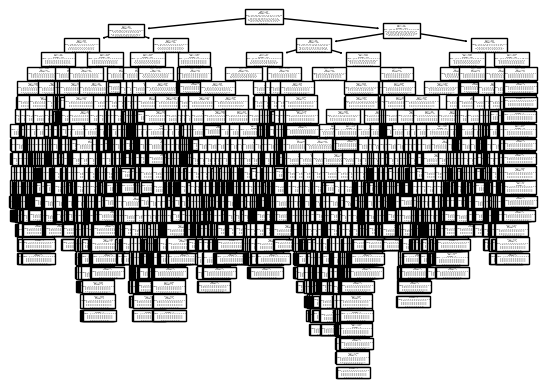

In [ ]:
from sklearn.tree import plot_tree
plot_tree(forest[0])

In [ ]:
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    predictions.append(tree.predict(X_test[tree.feature_names_in_]))

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))

In [ ]:
sum(predictions_per_object[0])

60

In [ ]:
# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append(1 if sum(obj) >= 50 else 0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_bin, voted_predictions)

0.769

In [ ]:
accuracy_score(y_test_bin, voted_predictions)

0.763